In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Decision Analysis Using AB Testing with Bayesian Statistics

In [2]:
# The analysis below tests the profitability of two seperate campaigns;
# Namely 'music industry' & 'aggregate of musis distribution'
# These different campaigns represent differences in target demographics and platform placements
# The aim of this analysis is to use bayesian statistics to determine which to double down on

# Read requisite file into program

In [3]:
time = pd.read_csv('/Users/emilyvincett/Downloads/Time (1).csv')
time

,Campaign Name,Time of Day (Ad Account Time Zone),Impressions,Frequency,Currency,Amount Spent (GBP),Landing Page Views,Cost per Landing Page View,Purchases,Cost per Purchase,"Cost per 1,000 People Reached","CPM (Cost per 1,000 Impressions)",Reporting Starts,Reporting Ends
0,Music Industry,20:00:00 - 20:59:59,507,NaN,GBP,4.647701,4.0,1.161925,NaN,NaN,NaN,9.167064,2020-12-01,2021-02-25
1,Music Industry,19:00:00 - 19:59:59,501,NaN,GBP,4.396746,1.0,4.396746,NaN,NaN,NaN,8.775939,2020-12-01,2021-02-25
2,Music Industry,21:00:00 - 21:59:59,428,NaN,GBP,4.386707,5.0,0.877341,NaN,NaN,NaN,10.249316,2020-12-01,2021-02-25
3,Music Industry,18:00:00 - 18:59:59,476,NaN,GBP,4.206019,3.0,1.402006,NaN,NaN,NaN,8.836175,2020-12-01,2021-02-25
4,Music Industry,08:00:00 - 08:59:59,413,NaN,GBP,3.814528,4.0,0.953632,1.0,3.814528,NaN,9.236146,2020-12-01,2021-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,Conversions - 01 - Feb,14:00:00 - 14:59:59,1,NaN,GBP,0.010000,NaN,NaN,NaN,NaN,NaN,10.000000,2020-12-01,2021-02-25
539,Males,14:00:00 - 14:59:59,1,NaN,GBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01,2021-02-25
540,Conversions - Jan 6 - PageViews LL (Copy),09:00:00 - 09:59:59,2,NaN,GBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01,2021-02-25
541,Conversion - Jan 8 - Brand New,09:00:00 - 09:59:59,1,NaN,GBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01,2021-02-25


In [4]:
# Use a boolean mask to filter the dataframe by interested campaigns 

mi = time[time['Campaign Name']=='Music Industry']
distro = time[(time['Campaign Name']=='Dig Distribution (Global)')|
     (time['Campaign Name']=='The One')|(time['Campaign Name']=='Conversions: 16 - 34/Distribution')]

# Purchases & Impressions in each campaign

In [5]:
print('Music Distribution yielded %d sales from %d impressions\nMusic Industry yielded %d sales from %d impressions'
      %(distro['Purchases'].sum(),distro['Impressions'].sum(),mi['Purchases'].sum(),mi['Impressions'].sum()))

Music Distribution yielded 12 sales from 7884 impressions
Music Industry yielded 7 sales from 7628 impressions


# Ratio of sales to impressions in each campaign group

In [6]:
per_distro = distro['Purchases'].sum()/distro['Impressions'].sum()
per_mi = mi['Purchases'].sum()/mi['Impressions'].sum()
print('Music Distribution Campaign Ratio is %.6f\nMusic Industry Campaign Ratio is %.6f' %(per_distro, per_mi))

Music Distribution Campaign Ratio is 0.001522
Music Industry Campaign Ratio is 0.000918


# Using a non informative prior distribution

In [7]:
# This prior distribution assumes an equal likelihood of values between 0 & 1.
# This is the assummed purchase rate before our model sees any data.
# Bayesian statistics needs 3 components the first of which is a prior distribution.
# This represents what our data would look like if we had no data but as our data gets larger we would
# expect the influence of the prior to reduce. 
# Will generate 100000 probabilites between 0 & 1. 


prior_rate = np.random.uniform(0,1,100000)

# Generative Model

In [8]:
# I've built 2 different models to represent our assumption of how our data has been generated.
# Using a binomial distribution to simulate the uncertainty of purchases. 
# It's a good distribution to model these types of discrete random events, representing
# a generalised Bernoulli trial, p representing the probability of sales for each simulation of x impressions.
# The model calculates the likelihood of generating our data i.e actual sales using each p value generated by 
# the prior rate.

def gen_model_a(p):
    return np.random.binomial(7884,p)

def gen_model_b(p):
    return np.random.binomial(7628,p)


# This process will generated different predicted sales for each simulation but we only select the predictions 
# that match our achieved sales i.e. 12 for model A and 7 for model B, along with their
# associated predicted purchase rates.

actual_purchases = distro['Purchases'].sum()
actual_purchases_b = mi['Purchases'].sum()

predicted_purchases = []
for p in prior_rate:
    predicted_purchases.append(gen_model_a(p))

predicted_purchases_b = []
for prob in prior_rate:
    predicted_purchases_b.append(gen_model_b(prob))    

# Posterior Rates

In [9]:
post_rate = prior_rate[list(map(lambda x: x==actual_purchases,predicted_purchases))]
post_rate_b = prior_rate[list(map(lambda x: x== actual_purchases_b,predicted_purchases_b))]

# Visualising our Prior and Posterior Distribution

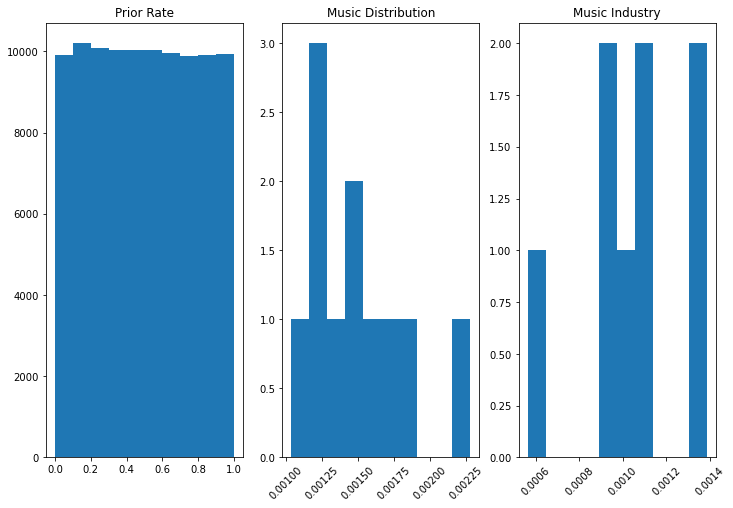

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title('Prior Rate')
plt.hist(prior_rate)
plt.subplot(1,3,2)
plt.title('Music Distribution')
plt.hist(post_rate)
plt.xticks(rotation=45)
plt.subplot(1,3,3)
plt.title('Music Industry')
plt.hist(post_rate_b)
plt.xticks(rotation=45)

plt.show()

# Dataframe of Predicted Purchase Rates

In [11]:
_ = pd.DataFrame(list(zip(post_rate,post_rate_b)),columns=['Music Distribution','Music Industry'])
_

,Music Distribution,Music Industry
0,0.001759,0.000943
1,0.001530,0.001329
2,0.001256,0.001385
3,0.001039,0.000947
4,0.001506,0.001091
5,0.002282,0.001021
6,0.001402,0.000563
7,0.001228,0.001103


# Which campaign is more profitable ?

In [12]:
# Each purchase earns £10 and cost per acquisiton is £5.
_['Profit Music Distribution']= _['Music Distribution']*(10-5)
_['Profit Music Industry'] = _['Music Industry']*(10-5)
_['diff'] = _['Profit Music Industry'] - _['Profit Music Distribution']
print('Music Distribution is more profitable than Music Industry %d%% of the time'
      %(len(_[_['diff']<0])/len(_)*100))

Music Distribution is more profitable than Music Industry 87% of the time


In [13]:
# This analysis can be improved by using a more informative prior distribution. 
# Represented by a Beta distribution which is congruent with the binomial used in the generative model
# This approach will allow for expert opinion to be represented in the model, as opposed to assuming equal
# likelihood of purchase rate between 0 & 1, which is not realistic.